In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import textwrap
import os

# Predictions Analysis

In [2]:
# Load the dataset
df = pd.read_feather("model_predictions.feather")
df.head()

,model_name,true_weight,predicted_weight,set_type,additional_params,patient_id,pixel_array_file
0,resnet_18_best,61.0,73.903252,Train,None,ANONYM-SMUXNZ_159,Scan_3774.npy
1,resnet_18_best,60.0,74.511299,Train,None,ANONYM-GS4VD_115,Scan_4161.npy
2,resnet_18_best,52.0,67.541008,Train,None,ANONYM-LWQW5V_143,Scan_343.npy
3,resnet_18_best,89.0,83.687981,Train,None,ANONYM-XT8UJZ_117,Scan_1163.npy
4,resnet_18_best,85.0,93.206604,Train,None,ANONYM-SMUXNZ_310,Scan_3925.npy


In [3]:
# filter out training data
df = df[df['set_type'] == 'Validation']
df.head()

,model_name,true_weight,predicted_weight,set_type,additional_params,patient_id,pixel_array_file
2344,resnet_18_best,82.0,88.795021,Validation,None,ANONYM-W6HAEI_27,Scan_862.npy
2345,resnet_18_best,99.0,98.479301,Validation,None,ANONYM-SMUXNZ_108,Scan_3722.npy
2346,resnet_18_best,70.0,65.589607,Validation,None,ANONYM-B4PMUQ_125,Scan_3042.npy
2347,resnet_18_best,105.0,97.008263,Validation,None,ANONYM-6LL37I_386,Scan_4904.npy
2348,resnet_18_best,50.0,87.231682,Validation,None,ANONYM-5ZVPRM_131,Scan_1403.npy


In [4]:
# Display basic information
display(df.head())
display(df.describe())
display(df.info())

,model_name,true_weight,predicted_weight,set_type,additional_params,patient_id,pixel_array_file
2344,resnet_18_best,82.0,88.795021,Validation,None,ANONYM-W6HAEI_27,Scan_862.npy
2345,resnet_18_best,99.0,98.479301,Validation,None,ANONYM-SMUXNZ_108,Scan_3722.npy
2346,resnet_18_best,70.0,65.589607,Validation,None,ANONYM-B4PMUQ_125,Scan_3042.npy
2347,resnet_18_best,105.0,97.008263,Validation,None,ANONYM-6LL37I_386,Scan_4904.npy
2348,resnet_18_best,50.0,87.231682,Validation,None,ANONYM-5ZVPRM_131,Scan_1403.npy


,true_weight,predicted_weight
count,3522.000000,3522.000000
mean,76.843782,76.699121
std,16.008089,13.053687
min,17.000000,39.856567
25%,65.000000,67.752277
50%,76.000000,75.632454
75%,87.000000,84.819374
max,132.000000,140.006561


<class 'pandas.core.frame.DataFrame'>
Index: 3522 entries, 2344 to 17585
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   model_name         3522 non-null   object 
 1   true_weight        3522 non-null   float64
 2   predicted_weight   3522 non-null   float64
 3   set_type           3522 non-null   object 
 4   additional_params  0 non-null      object 
 5   patient_id         3522 non-null   object 
 6   pixel_array_file   3522 non-null   object 
dtypes: float64(2), object(5)
memory usage: 220.1+ KB


None

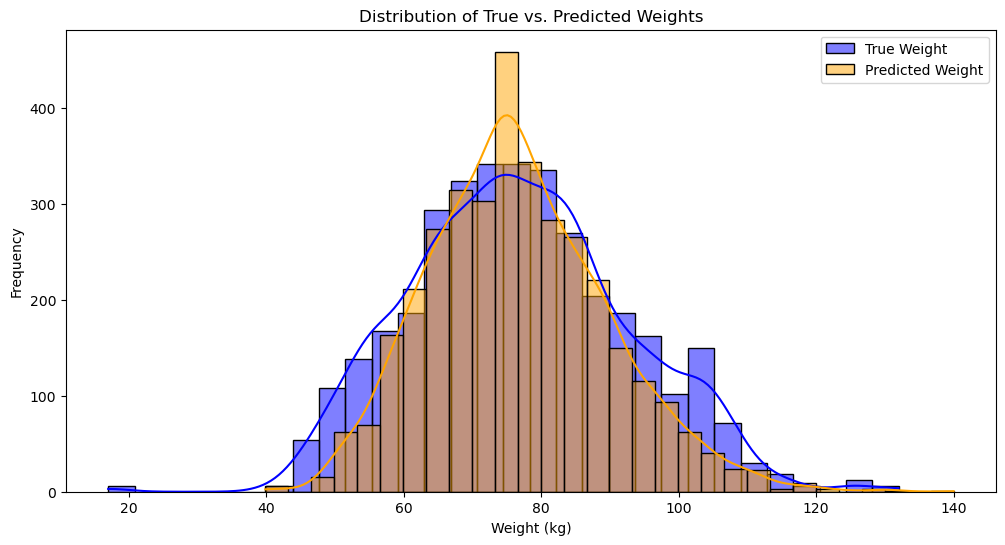

In [5]:
plt.figure(figsize=(12, 6))
sns.histplot(df['true_weight'], color='blue', kde=True, label='True Weight', bins=30)
sns.histplot(df['predicted_weight'], color='orange', kde=True, label='Predicted Weight', bins=30)
plt.legend()
plt.title("Distribution of True vs. Predicted Weights")
plt.xlabel("Weight (kg)")
plt.ylabel("Frequency")
plt.show()

In [6]:
# Calculate absolute error
df['absolute_error'] = abs(df['true_weight'] - df['predicted_weight'])
df.head()

,model_name,true_weight,predicted_weight,set_type,additional_params,patient_id,pixel_array_file,absolute_error
2344,resnet_18_best,82.0,88.795021,Validation,None,ANONYM-W6HAEI_27,Scan_862.npy,6.795021
2345,resnet_18_best,99.0,98.479301,Validation,None,ANONYM-SMUXNZ_108,Scan_3722.npy,0.520699
2346,resnet_18_best,70.0,65.589607,Validation,None,ANONYM-B4PMUQ_125,Scan_3042.npy,4.410393
2347,resnet_18_best,105.0,97.008263,Validation,None,ANONYM-6LL37I_386,Scan_4904.npy,7.991737
2348,resnet_18_best,50.0,87.231682,Validation,None,ANONYM-5ZVPRM_131,Scan_1403.npy,37.231682


In [ ]:
# Group by model and calculate the mean absolute error
mae_by_model = df.groupby("model_name")["absolute_error"].mean().reset_index()
# also the max and min value
mae_by_model['max_absolute_error'] = df.groupby("model_name")["absolute_error"].max().reset_index()['absolute_error']
mae_by_model['min_absolute_error'] = df.groupby("model_name")["absolute_error"].min().reset_index()['absolute_error']

# Sort by ascending mean absolute error
mae_by_model = mae_by_model.sort_values("absolute_error")

           model_name  absolute_error  max_absolute_error  min_absolute_error
0      resnet_10_best        8.590404           41.055992            0.002380
1      resnet_18_best        7.484907           37.231682            0.000443
2  resnet_50_pre_best        5.958035           35.865311            0.002888


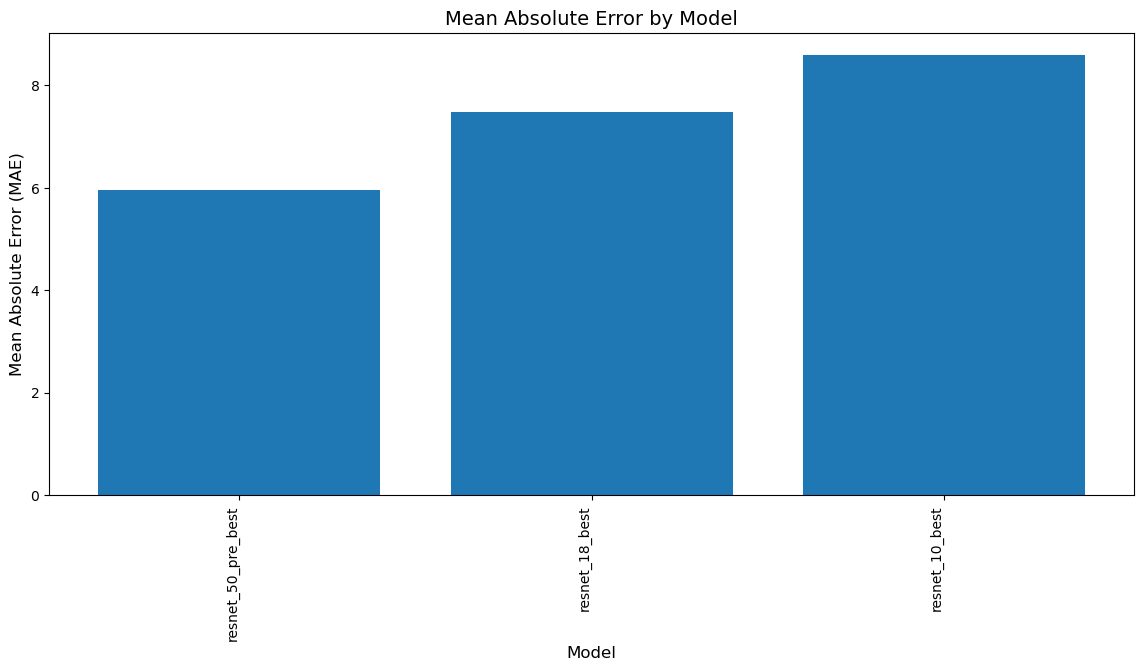

In [10]:
# Plot mean absolute error ascending per model 
# Plot the histogram
plt.figure(figsize=(14, 6))
plt.bar(mae_by_model["model_name"], mae_by_model["absolute_error"])
plt.xlabel("Model", fontsize=12)
plt.ylabel("Mean Absolute Error (MAE)", fontsize=12)
plt.title("Mean Absolute Error by Model", fontsize=14)
plt.xticks(rotation=90, ha="right", fontsize=10)
plt.show()

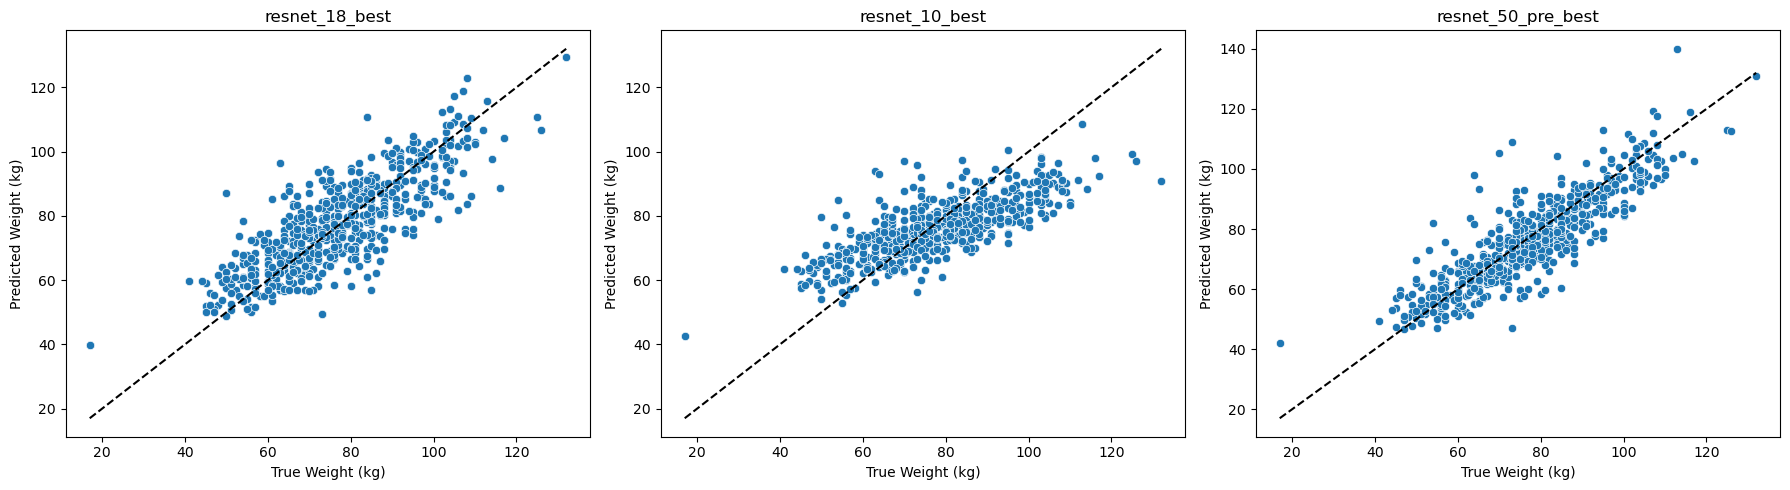

In [9]:
# Get unique model names
models = df['model_name'].unique()


# Adjust the number of rows based on the number of models
n_rows = (len(models) + 2) // 3  # 3 plots per row
fig, axes = plt.subplots(n_rows, 3, figsize=(18, n_rows * 5))  # Adjust the size as needed
axes = axes.flatten()  # Flatten the axes array for easy indexing

# Plot True Weight vs Predicted Weight for each model
for i, model in enumerate(models):
    ax = axes[i]
    model_data = df[df['model_name'] == model]
    
    sns.scatterplot(
        x='true_weight', 
        y='predicted_weight', 
        data=model_data, 
        ax=ax
    )
    ax.plot(
        [model_data['true_weight'].min(), model_data['true_weight'].max()], 
        [model_data['true_weight'].min(), model_data['true_weight'].max()], 
        'k--'
    )
    
    #Wrapping long titles
    wrapped_title = "\n".join(textwrap.wrap(model, width=60))  # Adjust width as needed
    
    ax.set_title(wrapped_title)
    ax.set_xlabel("True Weight (kg)")
    ax.set_ylabel("Predicted Weight (kg)")

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

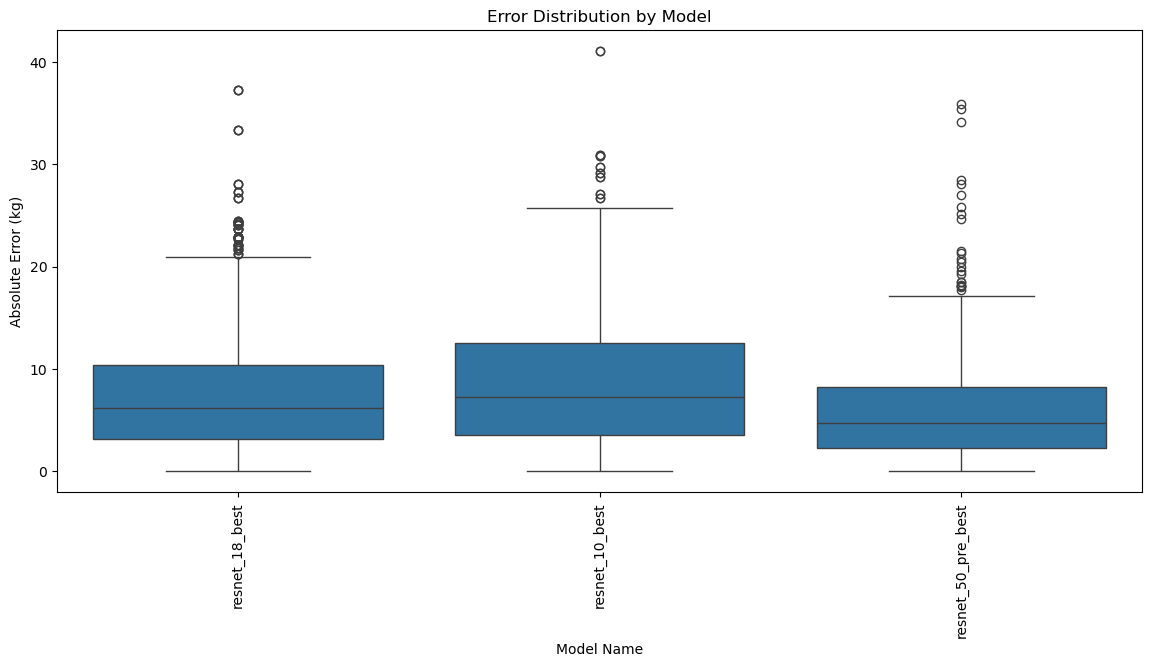

In [10]:
plt.figure(figsize=(14, 6))
sns.boxplot(x='model_name', y='absolute_error', data=df)
plt.xticks(rotation=90)
plt.title("Error Distribution by Model")
plt.ylabel("Absolute Error (kg)")
plt.xlabel("Model Name")
plt.show()

In [11]:
# Sort by model_name and absolute_error to find best/worst predictions
best_performance = df.loc[df.groupby('model_name')['absolute_error'].idxmin()]
worst_performance = df.loc[df.groupby('model_name')['absolute_error'].idxmax()]

display(best_performance[['model_name', 'patient_id', 'pixel_array_file', 'true_weight', 'predicted_weight', 'absolute_error']].head())
display(worst_performance[['model_name', 'patient_id', 'pixel_array_file', 'true_weight', 'predicted_weight', 'absolute_error']].head())

,model_name,patient_id,pixel_array_file,true_weight,predicted_weight,absolute_error
8407,resnet_10_best,ANONYM-5ZVPRM_362,Scan_1636.npy,71.0,71.002380,0.002380
2398,resnet_18_best,ANONYM-GS4VD_35,Scan_4079.npy,63.0,62.999557,0.000443
17016,resnet_50_pre_best,ANONYM-CKABW1_25,Scan_3200.npy,60.0,59.997112,0.002888


,model_name,patient_id,pixel_array_file,true_weight,predicted_weight,absolute_error
8443,resnet_10_best,ANONYM-LWQW5V_105,Scan_304.npy,132.0,90.944008,41.055992
2348,resnet_18_best,ANONYM-5ZVPRM_131,Scan_1403.npy,50.0,87.231682,37.231682
17231,resnet_50_pre_best,ANONYM-3X1ZSG_52,Scan_54.npy,73.0,108.865311,35.865311


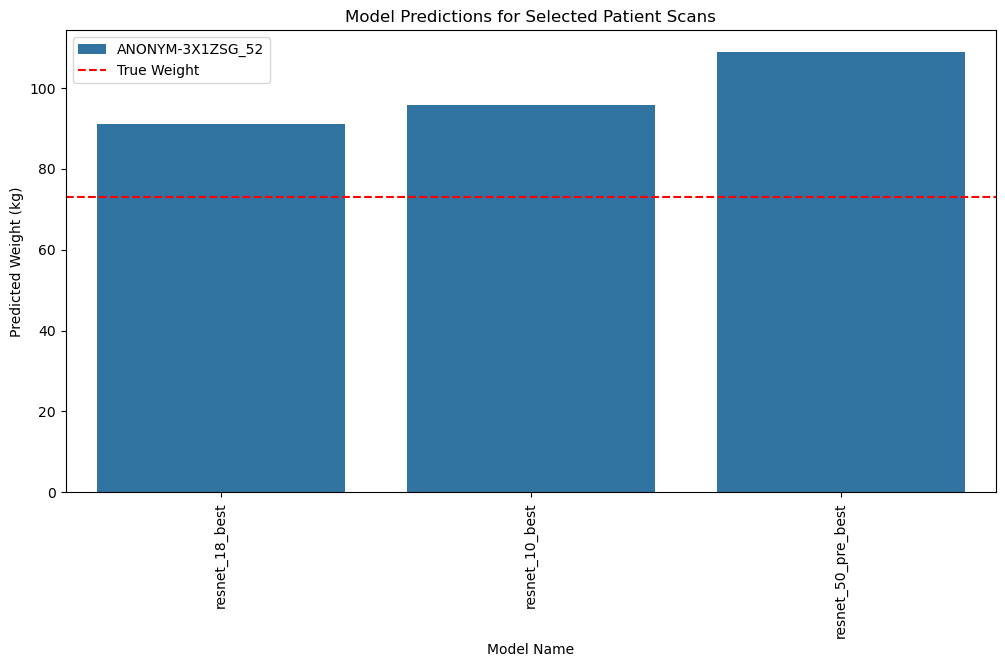

In [14]:
# Select specific scans
sample_scans = df[df['patient_id'].isin(['ANONYM-3X1ZSG_52'])]

# Plot predictions for each model on selected scans
plt.figure(figsize=(12, 6))
sns.barplot(x='model_name', y='predicted_weight', hue='patient_id', data=sample_scans)
plt.axhline(y=sample_scans['true_weight'].iloc[0], color='red', linestyle='--', label='True Weight')
plt.legend()
plt.title("Model Predictions for Selected Patient Scans")
plt.ylabel("Predicted Weight (kg)")
plt.xlabel("Model Name")
plt.xticks(rotation=90)
plt.show()